# Final Project

### Introduction

Our project consisted of looking for job posts through Indeed and Google and putting them into an excel file. We would put the job title, company name, posted date, job location, minimal salary, job duties, required skills, minimal years of experience, minimal education, and the job post URL into the excel file. Our objectives consisted of answering the questions using python and creating visualization whenever appropriate. 

Data used in this project: <a href='jobposts.xls'>data</a>

#### 2.1) What are the most common job titles?

In [1]:
import xlrd
from collections import Counter

In [45]:
book = xlrd.open_workbook('jobposts.xlsx')
sheet = book.sheet_by_name('jobs')
num_record = sheet.nrows

title_list = []
company_list = []
date_list = []
location_list = []
salary_list = []
duty_list = []
skills_list = []
exp_list = []
edu_list = []

for i in range(num_record):
    row = sheet.row_values(i)
    title, company, date, location, salary, duty, skills, exp, edu, url = row
    if i != 0:
        title_list.append(title)
        company_list.append(company)
        date_list.append(date)
        location_list.append(location)
        salary_list.append(salary)
        duty_list.append(duty)
        skills_list.append(skills)
        exp_list.append(exp)
        edu_list.append(edu)
        
count_result = Counter(title_list)
for key, value in count_result.most_common(5):
    print(key, value)

Intelligence Analyst 5
All Source/ Cyber Intelligence Analyst I 1
Counterintelligence Analyst 1
All-Source Intelligence Analyst 1
Threat Intelligence Analyst 1


In [46]:
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt

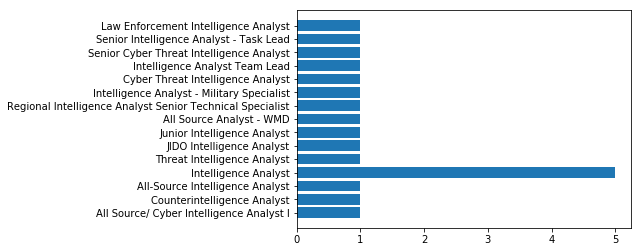

In [48]:
plt.barh(list(count_result.keys()), list(count_result.values()))
plt.show()

#### The most common job title was the title: Intelligence Analyst. This title appeared in 5 job posts, but all the other titles appeared only once. The bar chart shows roughly the frequency of the job titles compared to each other. 

#### 2.2) Which company posted the most number of jobs?

In [49]:
count_result = Counter(company_list)
for key, value in count_result.most_common():
    print(key, value)

Leidos 5
Booz Allen Hamilton 2
Peraton 1
Xator Corporation 1
Hilton 1
TechGuard 1
General Dynamics Information Technology 1
Perfecta 1
Perspecta  1
METIS Solutions, LLC 1
Verizon 1
Navy Federal Credit Union 1
Noblis 1
National Security Agency 1


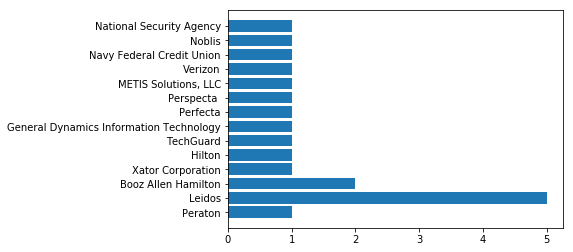

In [50]:
plt.barh(list(count_result.keys()), list(count_result.values()))
plt.show()

#### Leidos posted the most numbers of jobs with Booz Allen Hamilton coming in second. The rest of the companies each posted only once, so Ledios was the clear biggest poster. The bar chart displays this data as well. 

#### 2.3) How the number of job posts vary by days?

Counter({Timestamp('2019-04-10 00:00:00'): 3, Timestamp('2019-04-13 00:00:00'): 3, Timestamp('2019-04-02 00:00:00'): 2, Timestamp('2019-04-11 00:00:00'): 2, Timestamp('2019-04-12 00:00:00'): 2, Timestamp('2019-03-17 00:00:00'): 1, Timestamp('2019-03-20 00:00:00'): 1, Timestamp('2019-03-23 00:00:00'): 1, Timestamp('2019-03-29 00:00:00'): 1, Timestamp('2019-04-05 00:00:00'): 1, Timestamp('2019-04-09 00:00:00'): 1, Timestamp('2019-04-16 00:00:00'): 1})


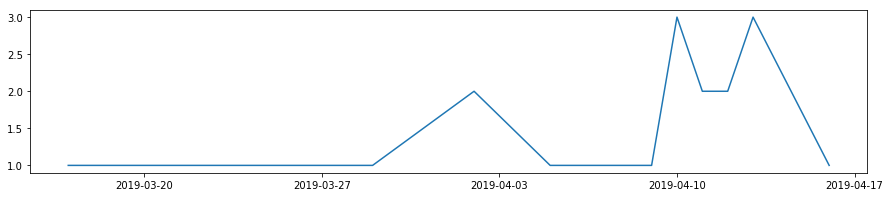

In [28]:
import pandas 
from matplotlib.pyplot import figure
df = pandas.read_excel('jobposts.xlsx')
df[:10]
#print(df['posted date'])

result = Counter(df['posted date'])

print(result)
figure(figsize = (15, 3))

plt.plot(result.keys(), result.values())
plt.show()

#### The day with the most number of job posts was April 10th, 2019. Job posts tended to get more frequent in April as opposed to in March, with the highest spikes of posts from April 10th, 2019 to April 17th, 2019.

#### 2.4) Where are the locations of the jobs?

In [40]:
count_result = Counter(location_list)
for key, value in count_result.most_common():
    print(key, value)

Washington, DC, US 3
Arlington, VA, US 2
Reston, VA, US 2
McLean, VA, US 2
Ft Meade, MD, US 2
Chantilly, VA, US 2
Vienna, VA, US 1
Springfield, VA, US 1
Ashburn, VA, US 1
Merrifield, VA, US 1
Dunn Loring, VA, US 1
Camp Springs, MD, US 1


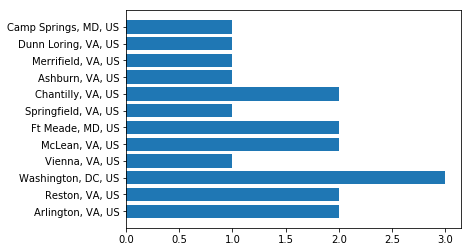

In [42]:
plt.barh(list(count_result.keys()), list(count_result.values()))
plt.show()

#### The most common location for the jobs is Washington, DC, US, with three job posts in that location. Tied for second is Arlington, VA, Reston, VA, McLean, VA, Ft Meade, MD, and Chantilly, VA. The bar chart above displays this data. 

#### 2.5) What is the average minimum salary? 

In [12]:
import numpy as np

In [13]:
print('The average {} is {}'.format('minimum salary', np.mean(salary_list)))

The average minimum salary is 76930.57894736843


#### The average minimum salary is $76,930.58. 

#### 2.6) What is the average minimal years of experience?

In [14]:
print('The average {} is {}'.format\
      ('minimum years of experience', np.mean(exp_list)))

The average minimum years of experience is 4.947368421052632


#### The average minimal years of experience is 4.95 years

#### 2.7) How are the years of experience related to the salaries?

In [15]:
print(np.corrcoef(exp_list, salary_list))

[[1.         0.05678879]
 [0.05678879 1.        ]]


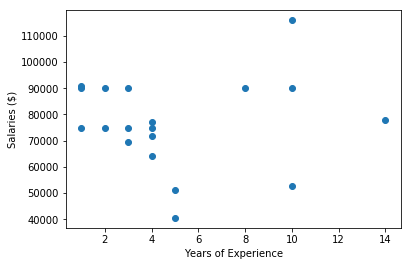

In [16]:
plt.scatter(exp_list, salary_list)
plt.xlabel('Years of Experience')
plt.ylabel('Salaries ($)')
plt.show()

#### The years of experience and salaries have a weak relationship, with a correlation coefficient of 0.057. The relationship is also positive with the salaries rising as the years of experience rises. The graph displays this weak, positive relationship.

#### 2.8) What are the common job duties?

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
stop = set(stopwords.words('english'))

In [23]:
for duty in df['job duty']:
    print(duty)

Conducts research and evaluates technical and all-source intelligence with specific emphasis on network operations and cyber warfare tactics, techniques, and procedures focused on the threat to networked weapons platforms and US and DoD information networks.
Correlates threat data, analyzes network events to determine the impact on current operations and conduct all-source research to determine advisory capability and intent.
Produces detailed intelligence analysis reports on cyber threats, to include those linked to cyber espionage, cyber crime, and other malicious actors.
Prepares assessments and cyber threat profiles of current events based on the sophisticated collection, research and analysis of classified and open source information.
Collects data using a combination of standard intelligence methods and business processes.
Fuse and analyze all-source information and intelligence to produce quality intelligence products, papers, presentations, recommendations, and findings for sen

In [24]:
duties = ''

for duty in df['job duty']:
    duties = duty + duties
print(duties)

Conduct extensive, comprehensive research and basic analysis on high priority counterintelligence threats
Review FBI reporting and raw data to identify information of interest upon instruction;
Conduct research via FBI, USIC and open source tools to obtain information that would assist in the intelligence analysis and production relating to highly prioritized counterintelligence threats;
 Enter raw data collected through FBI investigations into FBI systems and analytic tools such as Palantir as well as Microsoft suite tools;
Assist in exploiting and manipulating the bulk data for the purposes of analyzing trends and patterns;
Provide specialized support including but not limited to, identifying, categorizing or appropriately tagging large quantities of counterintelligence information in Palantir or other FBI tools/databases;
Conduct basic travel and communication analysis on subjects of interest and track the activities of these targets;
Shall conduct name checks through the utilizatio

In [25]:
import xlwt

In [35]:
book = xlwt.Workbook()
sheet_test = book.add_sheet('word_count')
i = 0
sheet_test.write(i, 0, 'word')
sheet_test.write(i, 1, 'count')
sheet_test.write(i, 2, 'ratio')

    
word_list = [i for i in duties.lower().split()\
                if i not in stop]
word_total = word_list.__len__()
    
count_result = Counter(word_list)
for result in count_result.most_common(10):
    i += 1
    sheet_test.write(i, 0, result[0])
    sheet_test.write(i, 1, result[1])
    sheet_test.write(i, 2, (result[1]/word_total))
        
book.save('jobduties.xls')

In [36]:
print(count_result)

Counter({'intelligence': 71, 'analysis': 32, 'information': 32, 'threat': 24, 'data': 21, 'support': 21, 'research': 18, 'security': 15, 'cyber': 15, 'conduct': 14, 'provide': 13, 'assessments': 11, 'new': 11, 'products': 11, 'source': 10, 'program': 10, 'current': 9, 'operations': 9, 'analytical': 9, 'team': 9, 'analysts': 9, 'reporting': 8, 'all-source': 8, 'collection': 8, 'skills': 8, 'methods': 8, 'identify': 7, 'open': 7, 'assist': 7, 'analytic': 7, 'customer': 7, 'analyst': 7, '–': 7, 'develop': 7, 'across': 7, 'analysis,': 7, 'requirements': 7, 'management': 7, 'targeting': 7, 'production': 6, 'including': 6, 'activities': 6, 'technology': 6, 'reports': 6, 'knowledge': 6, 'law': 6, 'critical': 6, 'client': 6, 'operational': 6, 'work': 6, 'events': 6, 'business': 6, 'counterintelligence': 5, 'threats': 5, 'fbi': 5, 'well': 5, 'analyzing': 5, 'trends': 5, 'technical': 5, 'within': 5, 'use': 5, 'national': 5, 'enforcement': 5, 'you’ll': 5, 'create': 5, 'prepare': 5, 'us': 5, 'prov

<img src="duties.png">

#### The common job duties included intelligence, with 71 words, analysis, with 32 words, information, with 32 words, threat, with 24 words, and data, with 21 words. The word cloud above shows the most common job duties, and the bigger the word, the more frequent it came in the job duties.

#### 2.9) What are the common skills?

In [31]:
for skill in df['required skills']:
    print(skill)

 Experience with cyber threat intelligence, security research, security operations and/or incident response.

Current Top Secret government security clearance and eligibility for SCI is required.

Knowledge on targeted technology as they pertain to the defense industry.

Experience in using a wide variety of analytical techniques used to determine and communicate trends and patterns, fill gaps in information and project events, identify anomalies, ascribe meaning to events or information from disparate sources, and develop defensible judgments and conclusions based on accepted research and analytical methodologies.

Experience with software applications such as Analyst Notebook; and expert in Microsoft Access, Excel, Power Point, Publisher, and Word.

Experience with graphical analytical presentations, charts, tables, pivot tables and visual aids to represent the threat.

Expert in social media intelligence analysis

US citizenship is required.
 Currently possess an active TS/SCI Secur

In [32]:
skills = ''

for skill in df['required skills']:
    skills = skill + skills
print(skills)

11 years of practical experience in intelligence analysis, targeting, or open source analysis, or technical analysis.
5 years- experience in IT, telecom, network/computer/data security
Proven ability to research and analyze data from a variety of sources and to present findings in clear and concise written reports
Demonstrated experience in the intelligence lifecycle
Proven experience with (drafting, coordinating, reviewing) intelligence community official communications methods
Demonstrated ability to work well with teams or individually with minimal supervision Subject matter expertise on priority national security targets as they pertain to the USIC.
Significant experience in using a wide variety of analytical techniques used to determine and communicate trends and patterns, fill gaps in information and project events, identify anomalies, ascribe meaning to events or information from disparate sources, and develop defensible judgments and conclusions based on accepted research and a

In [37]:
book = xlwt.Workbook()
sheet_test = book.add_sheet('word_count')
i = 0
sheet_test.write(i, 0, 'word')
sheet_test.write(i, 1, 'count')
sheet_test.write(i, 2, 'ratio')

    
word_list = [i for i in skills.lower().split()\
                if i not in stop]
word_total = word_list.__len__()
    
count_result = Counter(word_list)
for result in count_result.most_common(10):
    i += 1
    sheet_test.write(i, 0, result[0])
    sheet_test.write(i, 1, result[1])
    sheet_test.write(i, 2, (result[1]/word_total))
        
book.save('jobskills.xls')

In [38]:
print(count_result)

Counter({'experience': 47, 'intelligence': 26, 'security': 18, 'ability': 18, '-': 17, 'analysis': 15, 'information': 14, 'knowledge': 14, 'years': 12, 'cyber': 12, 'skills': 10, 'threat': 10, 'analytical': 9, 'working': 9, 'analysis,': 7, 'support': 7, 'strong': 7, 'able': 7, 'including': 7, 'research': 6, 'work': 6, 'microsoft': 6, 'operations': 6, 'must': 6, 'required': 6, 'active': 6, 'ts/sci': 6, 'writing': 6, 'and/or': 6, 'written': 5, 'demonstrated': 5, 'us': 5, 'management': 5, 'excellent': 5, 'expert': 5, 'clearance': 5, 'degree': 5, 'plus.': 5, 'source': 4, 'technical': 4, 'data': 4, 'variety': 4, 'expertise': 4, 'national': 4, 'techniques': 4, 'communicate': 4, 'identify': 4, 'access,': 4, 'excel,': 4, 'polygraph': 4, 'within': 4, 'possess': 4, 'following': 4, 'ct': 4, 'multiple': 4, 'specific': 4, 'complex': 4, 'research,': 4, 'range': 4, 'effectively': 4, 'functional': 4, 'foreign': 4, 'analyze': 3, 'present': 3, 'community': 3, 'using': 3, 'wide': 3, 'gaps': 3, 'events': 

<img src="skills.png">

#### The most common job skills are experience, with 47 words, intelligence, with 26 words, and security, with 18 words. The word cloud above shows the most common job skills based on their frequencies, so the bigger the word is, the more common it is. 

### Conclusion

Throughout our project, we did come across a few limitations. Figuring out which visualization would be most appropriate and actually visualizing it was one such limitation. Also, finding the most common duties and skills were questions we somewhat struggled with. Another limitation was using pandas for some of the questions because we were not very familiar with it. Some suggestions we have would be maybe finding less job posts because looking for them took quite a while. Another suggestion could be to assign different areas of job posts instead of just Intelligence Analysis to allow a variety of presentations and analysis from the different groups. This would allow the groups to compare the different aspects of the project with each other to see the differences of the different areas of job posts